In [1]:
import numpy as np
import propagator 
import imp  # imp.reload(module)
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [57]:
K=0.031
mu=0
name='me'
p1=propagator.propagator(name,K,mu,lamMax=500)

In [62]:
lam0=0
lam=1
l=1

In [63]:
eps = p1.eig[l]
print(eps)

(-1.99990389037+0j)


In [64]:
npts=100
G_direct=np.zeros(npts,dtype='complex')
G_Legendre = np.zeros(npts,dtype='complex')
p = np.linspace(0.001,-12.0,npts)+eps.imag*1j
for ii in range(0,npts):
    G_direct[ii]=p1.get_G_laplace(p[ii],lam0,lam,mu)
    res=p1.res[l][lam0,lam]
    a=p1.a[l][lam0,lam]
    b=p1.b[l][lam0,lam]
    G_Legendre[ii]= res/(p[ii]-eps) + a + b*(p[ii]-eps)
print('res',res,'a',a,'b',b)

res -0.00895021940822j a -0.00447564739469j b (-0-0.0022381193859j)


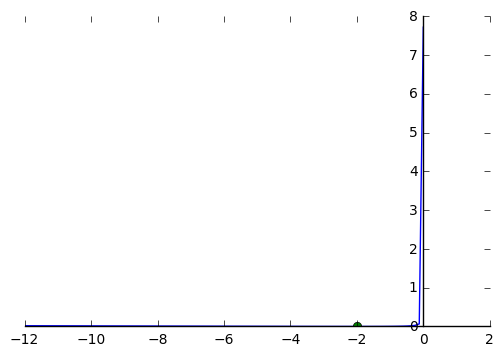

In [65]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(p.real,abs(G_Legendre-G_direct))#/abs(G_Legendre))
ax.plot(eps.real,0,'o')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#ax.set_ylim([0,0.5])
plt.show()

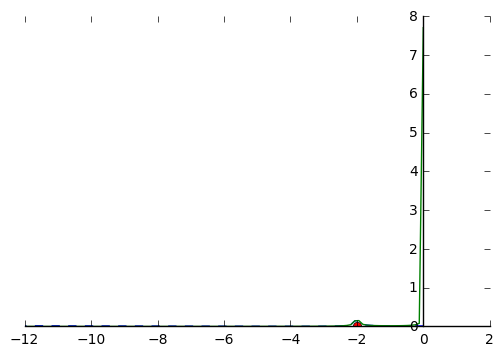

In [66]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(p.real,abs(G_Legendre),'--')
ax.plot(p.real,abs(G_direct))
ax.plot(eps.real,0,'o')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
#ax.set_ylim([0,0.5])
plt.show()

In [8]:
import WLCgreen as wlc
lamMax=500
nlam=10
d=3
p=eps
jp=wlc.get_jp(p,mu,K,lamMax,d)
jm=wlc.get_jm(p,mu,K,lamMax,d)
djp=wlc.get_djp(p,mu,K,lamMax,jp,d)
djm=wlc.get_djm(p,mu,K,lamMax,jm,d)
ddjp=wlc.get_ddjp(p,mu,K,lamMax,jp,djp,d)
ddjm=wlc.get_ddjm(p,mu,K,lamMax,jm,djm,d)
dddjp=wlc.get_dddjp(p,mu,K,lamMax,jp,djp,ddjp,d)
dddjm=wlc.get_dddjm(p,mu,K,lamMax,jm,djm,ddjm,d)

dwp=wlc.get_dw(jp,djp,mu)
dwm=wlc.get_dw(jm,djm,mu)
ddwp=wlc.get_ddw(jp,djp,ddjp,mu)
ddwm=wlc.get_ddw(jm,djm,ddjm,mu)
dddwp=wlc.get_dddw(jp,djp,ddjp,dddjp,mu)
dddwm=wlc.get_dddw(jm,djm,ddjm,dddjm,mu)


X1=wlc.get_X1(p,lam0,mu,K,jp,jm,d)
dX1=wlc.get_dX1(lam0,mu,K,dwp,dwm,d)
ddX1=wlc.get_ddX1(lam0,mu,K,ddwp,ddwm,d)
dddX1=wlc.get_dddX1(lam0,mu,K,dddwp,dddwm,d)

if lam0==lam:
    invG=X1
    dinvG=dX1
    ddinvG=ddX1
    dddinvG=dddX1
elif lam0<lam:
    cp=wlc.get_cp(lam,lam0,mu,K,d)
    pm=1
    Sp=wlc.get_Sp(lam,lam0,jp,djp,pm)
    dSp=wlc.get_dSp(lam,lam0,jp,djp,ddjp,pm)
    ddSp=wlc.get_ddSp(lam,lam0,jp,djp,ddjp,dddjp,pm)

    Xp=wlc.get_Xp(lam,lam0,jp,pm)
    dXp=wlc.get_dXp(Sp,Xp)
    ddXp=wlc.get_ddXp(Sp,dSp,Xp)
    dddXp=wlc.get_dddXp(Sp,dSp,ddSp,Xp) 

    invG=wlc.get_invG(cp,X1,Xp)
    dinvG=wlc.get_dinvG(cp,X1,dX1,Xp,dXp)
    ddinvG=wlc.get_ddinvG(cp,X1,dX1,ddX1,Xp,dXp,ddXp)
    dddinvG=wlc.get_dddinvG(cp,X1,dX1,ddX1,dddX1,Xp,dXp,ddXp,dddXp)
elif lam0>lam:
    cm=wlc.get_cm(lam,lam0,mu,K,d)
    pm=-1
    Sm=wlc.get_Sp(lam,lam0,jm,djm,pm)
    dSm=wlc.get_dSp(lam,lam0,jm,djm,ddjm,pm)
    ddSm=wlc.get_ddSp(lam,lam0,jm,djm,ddjm,dddjm,pm)

    Xm=wlc.get_Xp(lam,lam0,jm,pm)
    dXm=wlc.get_dXp(Sm,Xm)
    ddXm=wlc.get_ddXp(Sm,dSm,Xm)
    dddXm=wlc.get_dddXp(Sm,dSm,ddSm,Xm)

    invG=wlc.get_invG(cm,X1,Xm)
    dinvG=wlc.get_dinvG(cm,X1,dX1,Xm,dXm)
    ddinvG=wlc.get_ddinvG(cm,X1,dX1,ddX1,Xm,dXm,ddXm)
    dddinvG=wlc.get_dddinvG(cm,X1,dX1,ddX1,dddX1,Xm,dXm,ddXm,dddXm)

In [9]:
print(dddjm)

[  0.00000000e+00 +0.00000000e+00j  -2.86741803e-04 +8.90484544e-02j
   4.97277598e+00 -5.33008099e+00j   4.11642326e+02 +5.73392849e+02j
   7.85160988e+05 -3.11014017e+05j  -1.43145953e+10 -2.21432149e+10j
  -2.69217145e+15 +5.91510703e+15j   9.39997250e+21 -4.01343677e+21j
  -7.95595262e+28 -1.31592481e+28j   2.17577440e+36 +1.53181060e+36j
  -3.01438307e+43 -1.17269460e+43j   9.86709754e+41 -6.85105804e+41j
   3.35799056e+36 -5.89933755e+36j   2.13634293e+30 -5.78555736e+30j
   6.27796725e+23 -2.90192212e+24j   7.29153157e+16 -7.87285038e+17j
  -1.72745500e+11 -6.75521968e+11j   5.59778861e+07 +1.55843874e+08j
  -1.40092891e+04 -3.45816136e+04j   2.74298717e+00 +6.13046754e+00j
  -4.27769675e-04 -8.78969404e-04j   4.97451198e-08 +1.03289687e-07j
  -2.84138079e-09 +1.40857132e-10j  -1.96408600e-09 +9.52681279e-11j
  -1.38262547e-09 +6.14115042e-11j  -9.87889016e-10 +4.03322534e-11j
  -7.15555151e-10 +2.69455527e-11j  -5.24860162e-10 +1.82880624e-11j
  -3.89490474e-10 +1.25943425e-11j

limit_output extension: Maximum message size of 10000 exceeded with 17286 characters

In [10]:
old_settings = np.seterr(all='ignore')


tol=1.0*10**-30
if abs(dinvG)<tol:
    dinvG=np.NaN

res=1.0/dinvG # residue of 1st order pole
a=-0.5*(res**2)*ddinvG # constant term
b=((a**2)/res) - ((res**2)/6.0)*dddinvG # (p-eps)^1 term
# G = res/(p-eps) + a + b*(p-eps) + ...

np.seterr(**old_settings)


{'divide': 'ignore', 'invalid': 'ignore', 'over': 'ignore', 'under': 'ignore'}

In [11]:
res

(0.3338895129350988-0.3032534561213759j)

In [12]:
a

(0.05020259240370176-0.06764362685157256j)

In [13]:
b

(0.005050404195064936+0.00816184356977272j)